# Visualization of the variant share across the pandemic 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import util
from PIL import Image

## Loading data

In [21]:
df = pd.read_csv("data/output/covid_variant_share.csv")
df.date = pd.to_datetime(df.date)

## Preparing data

In [22]:
df = df[df.columns[:6]].copy()
df.columns = df.columns.str.replace('VOC ','')
df.columns = df.columns.str.replace(' percentual_share','')
df = df.drop(columns=['Beta'])
df['Others'] = 100 - df.drop(columns=['date']).sum(axis=1)

## Plotting chart

In [23]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")
colors = util.get_default_colors_categorical_seaborn()

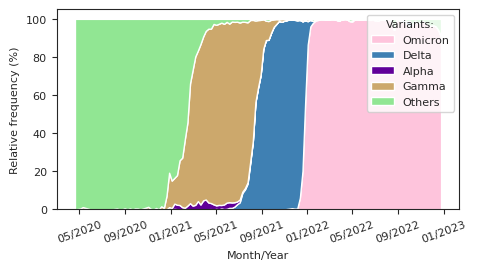

In [24]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(6.6)))

variants = df.columns[1:]
plt.stackplot(df['date'], [df[var] for var in variants], labels=variants, colors=util.get_default_colors_categorical_seaborn(6))

plt.xlabel('Date')
plt.ylabel('Relative frequency (%)')
plt.legend(title='Variants:', loc='best')

ax.xaxis.set_major_formatter(myFmt)
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.savefig('images/covid_variants.pdf', bbox_inches="tight")
plt.savefig('images/covid_variants.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/covid_variants.tiff")
img.save("images/covid_variants_compressed.tiff", compression="tiff_lzw")
plt.show()